Importing the necessary packages


In [1]:
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the dataset using HuggingFace Transformers


In [2]:
dataset = load_dataset("snli")

Creating a subset of the dataset consisting of validation data and converting it to Pandas dataframe


In [3]:
subset = dataset["validation"]
subset_df = pd.DataFrame(subset)

Outputting a content of the first 5 entries of the dataframe


In [4]:
for index, row in subset_df.head(5).iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Label: {row['label']}\n")

Premise: Two women are embracing while holding to go packages.
Hypothesis: The sisters are hugging goodbye while holding to go packages after just eating lunch.
Label: 1

Premise: Two women are embracing while holding to go packages.
Hypothesis: Two woman are holding packages.
Label: 0

Premise: Two women are embracing while holding to go packages.
Hypothesis: The men are fighting outside a deli.
Label: 2

Premise: Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.
Hypothesis: Two kids in numbered jerseys wash their hands.
Label: 0

Premise: Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.
Hypothesis: Two kids at a ballgame wash their hands.
Label: 1



Showing the distribution of the labels with a plot diagram. We can observe that the distribution is uniform apart from the "unclassified" label -1


/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


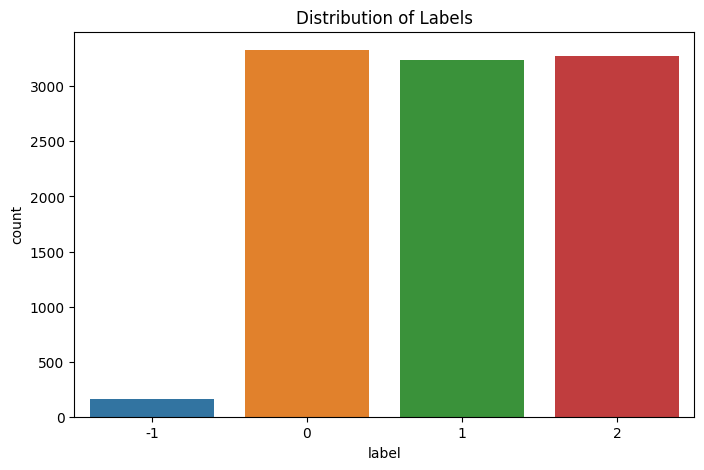

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=subset_df)
plt.title('Distribution of Labels')
plt.show()

Giving the overview of the lengths of premises and hypotheses contained in the dataset. We can observe that in general the length of premises is larger than the length of hypotheses


In [6]:
premise_lengths = subset_df['premise'].apply(len)
hypothesis_lengths = subset_df['hypothesis'].apply(len)
print("Premise Lengths (sample):")
print(premise_lengths.head())
print("Hypothesis Lengths (sample):")
print(hypothesis_lengths.head())

Premise Lengths (sample):
0     53
1     53
2     53
3    161
4    161
Name: premise, dtype: int64
Hypothesis Lengths (sample):
0    85
1    31
2    36
3    46
4    40
Name: hypothesis, dtype: int64


Giving the distribution of the length values for premises and hupotheses contained in the dataset. From the plot we can see that most of the premises and hypotheses have length between 0 and 100 characters, with the most common value being approximately 50


/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/t.voitekh/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

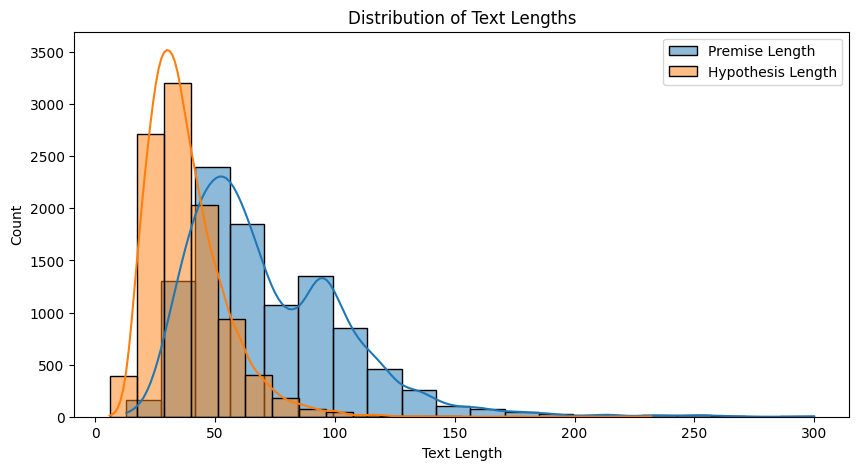

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(premise_lengths, bins=20, kde=True, label='Premise Length')
sns.histplot(hypothesis_lengths, bins=20, kde=True, label='Hypothesis Length')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.legend()
plt.show()

Here we output some statistics about the lengths of the premises and the hypotheses. It can be observed that the values of all the metrics of the premises are greater than those of the hypotheses


In [8]:
premise_max = np.max(premise_lengths)
premise_avg = np.mean(premise_lengths)
premise_median = np.median(premise_lengths)
premise_min = np.min(premise_lengths)

hypothesis_max = np.max(hypothesis_lengths)
hypothesis_avg = np.mean(hypothesis_lengths)
hypothesis_median = np.median(hypothesis_lengths)
hypothesis_min = np.min(hypothesis_lengths)

print("Premise Length Statistics:")
print(f"Maximum: {premise_max}")
print(f"Average: {premise_avg}")
print(f"Median: {premise_median}")
print(f"Minimum: {premise_min}")

print("\nHypothesis Length Statistics:")
print(f"Maximum: {hypothesis_max}")
print(f"Average: {hypothesis_avg}")
print(f"Median: {hypothesis_median}")
print(f"Minimum: {hypothesis_min}")

Premise Length Statistics:
Maximum: 300
Average: 72.37
Median: 64.0
Minimum: 13

Hypothesis Length Statistics:
Maximum: 232
Average: 37.9336
Median: 35.0
Minimum: 6


Here we output the unique labels. Note that dataset also containes constructions labeled with -1. This indicates that they could not be classified appropriately


In [9]:
unique_labels = set(subset_df['label'])
print("Unique Labels:", unique_labels)

Unique Labels: {0, 1, 2, -1}


Here we analyse if the dataset contains any missing values (i.e null values). As can be seen below, all the values in the dataset are null, hence, additional preprocessing is not needed.


In [10]:
missing_values = subset_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
premise       0
hypothesis    0
label         0
dtype: int64


Finally, we give an overview of the meaning of the labels in the dataset. Labels are ranged from 0 to 2 matching to "enatailment", "neutral", and "contradiction" respectively. Consider a final example in each category (a premise starting with "A man in a blue shirt standing..."). Here in each category you can see that the hypothesis precisely aligns with the label


In [11]:
entailment_examples = subset_df[subset_df['label'] == 0].iloc[:5, [0, 1]]
neutral_examples = subset_df[subset_df['label'] == 1].iloc[:5, [0, 1]]
contradiction_examples = subset_df[subset_df['label'] == 2].iloc[:5, [0, 1]]

print("Examples of Entailment:")
print(entailment_examples)
print()

print("Examples of Neutral:")
print(neutral_examples)
print()

print("Examples of Contradiction:")
print(contradiction_examples)
print()

Examples of Entailment:
                                              premise  \
1   Two women are embracing while holding to go pa...   
3   Two young children in blue jerseys, one with t...   
8   A man selling donuts to a customer during a wo...   
9   Two young boys of opposing teams play football...   
13  A man in a blue shirt standing in front of a g...   

                                        hypothesis  
1                  Two woman are holding packages.  
3   Two kids in numbered jerseys wash their hands.  
8              A man selling donuts to a customer.  
9                               boys play football  
13                   A man is wearing a blue shirt  

Examples of Neutral:
                                              premise  \
0   Two women are embracing while holding to go pa...   
4   Two young children in blue jerseys, one with t...   
7   A man selling donuts to a customer during a wo...   
11  Two young boys of opposing teams play football...   
12  A ma